In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleanData.csv") 

df.head()

,Unnamed: 0,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,8,1,2,1,1,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,14,1,2,1,2,3,1,1,1,1,...,2,3,3,3,2,2,1,1,1,1
2,15,1,2,1,3,4,5,5,4,4,...,5,4,4,5,5,4,4,4,5,4
3,22,1,2,1,3,3,3,3,3,3,...,3,2,1,1,1,3,2,2,2,2
4,23,1,2,1,2,4,5,3,3,3,...,2,2,4,4,5,5,4,4,5,5


In [12]:
# Run describe on dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleanData.csv") 

df.describe()

,Unnamed: 0,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,...,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000
mean,3013.478660,2.536508,7.331570,1.196473,1.867725,2.905115,2.630688,2.926279,3.141446,2.943915,...,3.311817,3.360494,3.405644,3.426455,3.189065,3.117108,3.416226,3.230688,3.092416,3.407055
std,1635.136195,0.686849,3.564029,0.510153,1.449624,1.280034,1.277393,1.209465,1.156474,1.210120,...,1.188387,1.204200,1.185883,1.180501,1.199368,1.204719,1.156866,1.195311,1.238039,1.204886
min,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1624.000000,2.000000,5.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3169.000000,3.000000,8.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000
75%,4385.500000,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5816.000000,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
# Cleaning the data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import data set
thisDataFrame = pd.read_csv("data.csv") 

#Range of columns we wanna look at (questions 1 to 28)
columns_range = thisDataFrame.loc[:, 'Q1':'Q28']

#sorter alle svar fra studenter der har svaret det samme til alle spørgsmål ud af datasættet
thisDataFrame = thisDataFrame[columns_range.apply(lambda x: min(x) != max(x), 1)]

# show number of lines removed during cleaning
df = pd.read_csv("data.csv")
lbc = df['instr'].count()
lac = thisDataFrame['instr'].count()
print('number of lines before cleaning: ', lbc)
print('number of lines after cleaning: ', lac)
print('number of lines removed: ', lbc - lac)

#Vis Filtered dataset
thisDataFrame


number of lines before cleaning:  5820
number of lines after cleaning:  2835
number of lines removed:  2985


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
8,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
14,1,2,1,2,3,1,1,1,1,1,...,2,3,3,3,2,2,1,1,1,1
15,1,2,1,3,4,5,5,4,4,5,...,5,4,4,5,5,4,4,4,5,4
22,1,2,1,3,3,3,3,3,3,3,...,3,2,1,1,1,3,2,2,2,2
23,1,2,1,2,4,5,3,3,3,2,...,2,2,4,4,5,5,4,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,3,13,1,3,5,2,2,2,1,1,...,1,1,1,1,1,1,1,1,1,1
5808,3,13,1,3,3,1,1,1,5,1,...,2,3,2,2,3,2,2,3,2,2
5813,3,13,2,3,4,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5814,3,13,1,2,4,1,1,1,1,1,...,2,1,1,2,1,1,1,1,1,1


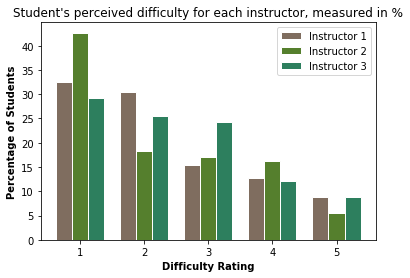

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Bar chart displaying ...

df = pd.read_csv("cleanData.csv")    
# Data Striping
columns_range =df.loc[:, 'Q1':'Q28']

#count how many students answered for each teacher
to_ratio= df.groupby("instr")["difficulty"].count()
#Count how many students answered for each answer for each teacher
count_answers =df.groupby("instr")["difficulty"].apply(pd.value_counts)

# Set width of bar
bar_width = 0.25
 
# Set height of bar (we )
bars1 = count_answers[1]/to_ratio[1]*100
bars2 = count_answers[2]/to_ratio[2]*100
bars3 = count_answers[3]/to_ratio[3]*100
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=bar_width, edgecolor='white', label='Instructor 1')
plt.bar(r2, bars2, color='#557f2d', width=bar_width, edgecolor='white', label='Instructor 2')
plt.bar(r3, bars3, color='#2d7f5e', width=bar_width, edgecolor='white', label='Instructor 3')

# Add xticks on the middle of the group bars & set labels
plt.xticks([r + bar_width for r in range(len(bars1))], ['1', '2', '3', '4', '5'])
plt.xlabel('Difficulty Rating', fontweight='bold')
plt.ylabel('Percentage of Students', fontweight='bold')
plt.title("Student's perceived difficulty for each instructor, measured in %")

# Create legend & Show graphic
plt.legend()
plt.show()


In [12]:
# 2. Is perceived difficulty higher for certain courses?

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleanData.csv")    
#take mean values and group by class and sort the values
df = df.groupby("class")["difficulty"].mean().reset_index(name='difficulty_mean').sort_values(['difficulty_mean'], ascending=False)
#print without index
print(df.to_string(index=False))



 class  difficulty_mean
     7         3.900990
     2         3.302326
    11         3.181416
     8         3.129909
     3         3.071429
     5         3.033241
    12         3.000000
     4         2.949580
     9         2.796552
    10         2.686047
     6         2.588462
     1         2.529412
    13         2.486284


In [5]:
# 3. Is perceived difficulty higher or lower for students who have repeated the course more than once?

import pandas as pd
import matplotlib.pyplot as plt
    
df = pd.read_csv("cleanData.csv")

# filterA=df["nb.repeat"] > 1  
# filterB=df["nb.repeat"] == 1  
# print(df[filterA]["difficulty"].mean(),df[filterB]["difficulty"].mean())

filter1 = df["nb.repeat"] == 1
filter2 = df["nb.repeat"] == 2
filter3 = df["nb.repeat"] == 3

print(df[filter1]["difficulty"].mean(), df[filter2]["difficulty"].mean(), df[filter3]["difficulty"].mean())



2.873710276516715 3.067415730337079 3.1310344827586207


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleanData.csv")

#Limit df to instructor col and Q13 to Q28
q_range=['instr']
for i in range(13,28):
    q_range.append('Q'+str(i))

#group by instructor and take the mean on each columns
df =df[q_range].groupby('instr').mean()
#Take the means of each row
print(df.mean(axis=1))

df2 = pd.read_csv("cleanData.csv")

#Limit df to instructor col and Q13 to Q28
q_range=['instr','difficulty']

#group by instructor and take the mean on each columns
df2 =df2[q_range].groupby('instr').mean()
#Take the means of each row
df2.mean(axis=1)


instr
1    3.375738
2    3.548192
3    3.195427
dtype: float64


instr
1    3.158228
2    2.736070
3    2.924333
dtype: float64

In [6]:
# 5. Is perceived difficulty different for those with higher attendance than for those with lower attendance?

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleanData.csv")

high_attendance=df["attendance"] >  2
low_attendance=df["attendance"] <  2
mid_attendance=df["attendance"] ==  2

print(df[high_attendance]["difficulty"].mean())
print(df[mid_attendance]["difficulty"].mean())
print(df[low_attendance]["difficulty"].mean())


3.2843642611683848
3.299043062200957
2.4213886671987233


In [3]:
# 6. Is the score for Q9 (“I greatly enjoyed the class and was eager to actively participate during the lectures.”)
# an indicator for whether or not students find the course difficult?

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleanData.csv")

high_score = df["Q9"] >  3
low_score = df["Q9"] <  3
mid_score = df["Q9"] ==  3


print(df[high_score]["difficulty"].mean())
print(df[mid_score]["difficulty"].mean())
print(df[low_score]["difficulty"].mean())

2.8157894736842106
2.8885762521102984
2.614113159567705


In [1]:
# 7. Are some instructors rated more difficult on certain courses?
# Meaning that some instructors may be worse at teaching those courses.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleanData.csv")

df_allclasses = df[['class', 'instr', 'difficulty']].groupby('class').mean()
# printing this shows us that class number 13 has more than one instuructor, as the instructor number has an average of 2.85
print(df_allclasses)

# So we will find out which instructors teach class 13 below:
df2 = df[['class', 'instr', 'difficulty']].loc[df['class'] == 13]

df2[['class', 'instr', 'difficulty']].groupby('instr').mean()


          instr  difficulty
class                      
1      2.000000    2.529412
2      1.000000    3.302326
3      3.000000    3.071429
4      3.000000    2.949580
5      3.000000    3.033241
6      2.000000    2.588462
7      1.000000    3.900990
8      3.000000    3.129909
9      3.000000    2.796552
10     1.000000    2.686047
11     2.000000    3.181416
12     3.000000    3.000000
13     2.850374    2.486284
      class  instr  difficulty
938      13      2           1
939      13      2           3
940      13      2           2
941      13      2           4
942      13      2           1
...     ...    ...         ...
2830     13      3           5
2831     13      3           3
2832     13      3           4
2833     13      3           4
2834     13      3           4

[401 rows x 3 columns]


,class,difficulty
instr,,
2,13.0,2.166667
3,13.0,2.542522


ValueError: shape mismatch: objects cannot be broadcast to a single shape

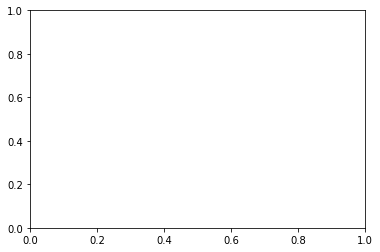

In [16]:
# Seeing if the questions Q13 - Q28 have similar results, so we know if we have good casue to bundle them,
# or if we should remove some of them before bundling.

# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import cleaned dataset
df = pd.read_csv("cleanData.csv")

# save mean value of the questions in range Q13 - Q28
dfquestmeans = df.loc[:, 'Q13':'Q28'].mean()

# set figure in matplotlib
fig = plt.figure()

# set x and y axis
x = np.arange(13, 28)
y = dfquestmeans


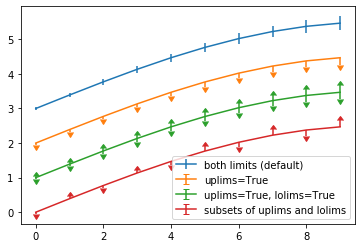

In [17]:
# This is ust an example for learning how to do this, but I can't understand it properly right now.
# I want to create this kind of plot, with the questions 13 - 28 as the x-axis and the mean answers
# of these questions as the y-axis, with standard mean deviation in the code that I have started above this
...Thomas?

import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')